<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/NLP_LAB_10_2030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
if 'gensim' not in sys.modules:
  !pip install gensim

# Embedding model
import gensim.downloader as api

# Numerical computations
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.manifold import TSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 48.7 MB/s eta 0:00:00


In [3]:
# Load pre-trained Word2Vec embeddings
print("Loading pre-trained Word2Vec model...")
model = api.load("word2vec-google-news-300")

# Vocabulary size
print("Vocabulary size:", len(model.key_to_index))

# Display one example word vector
example_word = "computer"
print(f"\nVector for word '{example_word}':")
print(model[example_word])
print("Vector dimension:", model[example_word].shape)


Loading pre-trained Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary size: 3000000

Vector for word 'computer':
[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828

In [5]:
# Load word list dataset
df = pd.read_csv("/content/word_list_tsne.csv")

# Display first few rows
df.head()


,word
0,dog
1,cat
2,lion
3,tiger
4,elephant


In [7]:
# Extract vectors for words that exist in the model
words = df['word'].tolist()
word_vectors = []
valid_words = []

for word in words:
    if word in model:
        word_vectors.append(model[word])
        valid_words.append(word)

print("Words found in model:", len(valid_words))


Words found in model: 39


In [9]:
# Apply t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=42,
    n_iter=1000
)

X = np.array(word_vectors)
X_2d = tsne.fit_transform(X)

print("t-SNE output shape:", X_2d.shape)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE output shape: (39, 2)


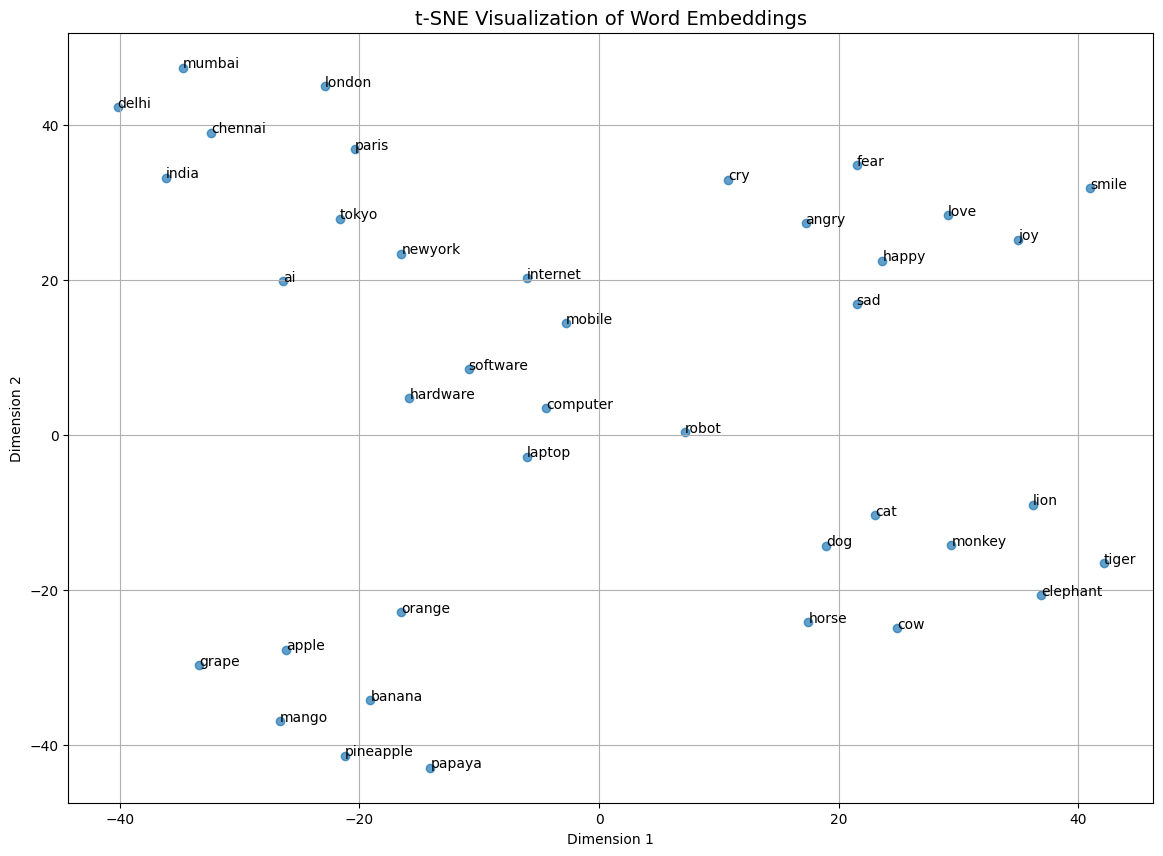

In [10]:
plt.figure(figsize=(14, 10))

plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)

# Annotate each word
for i, word in enumerate(valid_words):
    plt.annotate(word, (X_2d[i, 0], X_2d[i, 1]))

plt.title("t-SNE Visualization of Word Embeddings", fontsize=14)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
